# Initialize Data

In [22]:
# Initialize working environment
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd
import missingno as msno
from scipy.stats import chi2_contingency

The goal of this project is to analyze different species that become endangered. The goal is to find any patterns related to species that go extinct in relation to each other and the relationship of extinction to the park type.

The overall process will start by reviewing and cleaning the data to make it workable for review. 

From there, I will create bar graphs based observations, location, and species to come up with some trends. The question to answer is, what species are most vulnerable in the different locations? Is there a driver of what makes a species vulnerable?

# Import data and clean

The data was provided by code cademy with two files title 'Observations' and 'Species' were given for review. The following steps will look at the shape of the data, check for data types, and understand missing or blank data. 

In [23]:
obs = pd.read_csv('observations.csv', encoding='utf-8')
obs

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
...,...,...,...
23291,Croton monanthogynus,Yosemite National Park,173
23292,Otospermophilus beecheyi,Bryce National Park,130
23293,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140
23294,Dicranella rufescens,Yosemite National Park,171


Looking at the shape of the data, there are 23296 rows with 3 columns in the observations document. I also look at the data types for helping with crafting graphs below. 

In [24]:
obs.dtypes

scientific_name    object
park_name          object
observations        int64
dtype: object

In [25]:
obs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


Looking at the basic information, there are three colums whith different object types. I can tell that there are no non-null values based on the number of entries and the non-null count. But, graphics are also great to represent the data. Below is a matrix of any non-null values. 

<AxesSubplot:>

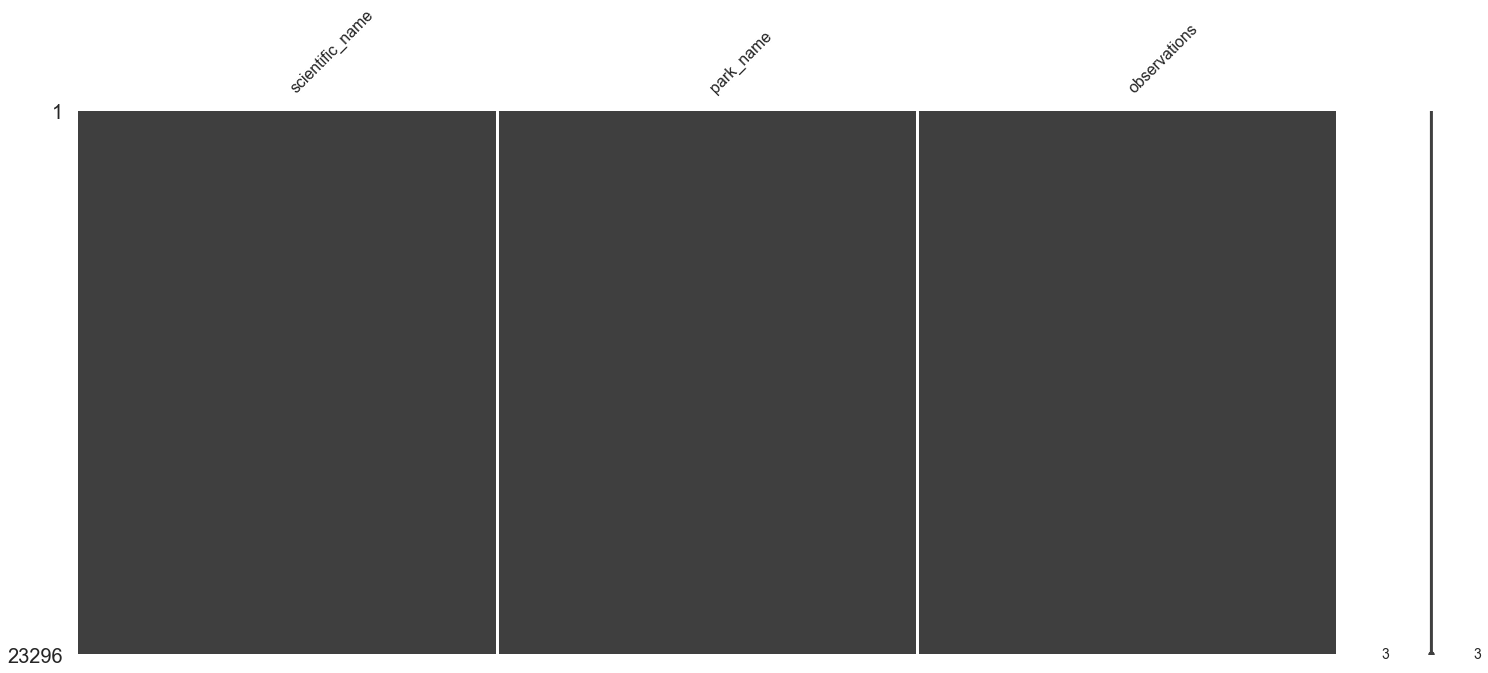

In [26]:
msno.matrix(obs)

The info print out also gives a good shape of the data and used as another way to review and check for null values. All the values are non-null. 

In [27]:
species = pd.read_csv('species_info.csv', encoding='utf-8')
species

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,NaN
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",NaN
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",NaN
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",NaN


In [28]:
species.dtypes

category               object
scientific_name        object
common_names           object
conservation_status    object
dtype: object

In [29]:
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


The shape of the data is 5824 entries with four column names. The conservation status has many non-null values. The graphic below shows a lot of empty rows in conservation status. There will need to be a close examination of the conservation status when analyzing the data. The information is very incomplete and significance thresholds will need to be evaluated. 

<AxesSubplot:>

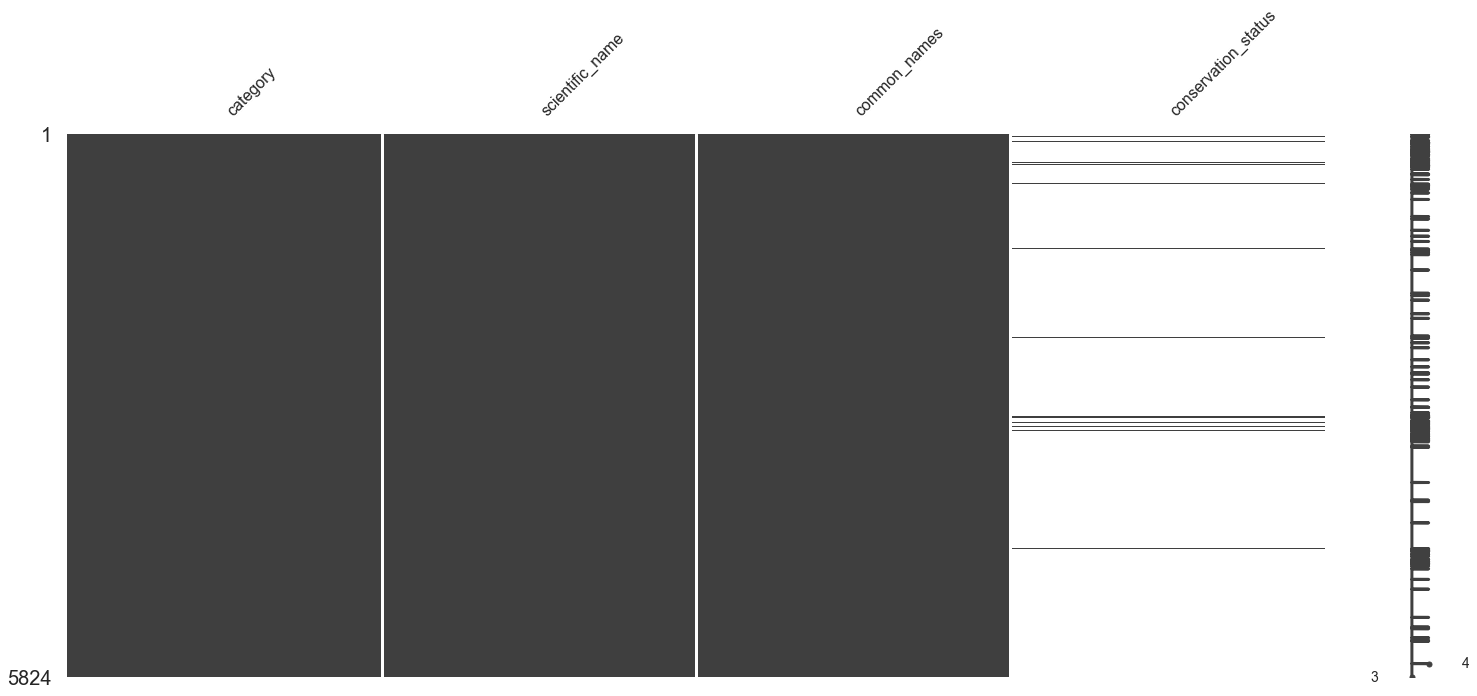

In [30]:
msno.matrix(species)

Conservation status has a lot of null values. With the data having 5824 rows and the conservation status has 191 non-null items. I also expect a majority of the species reviewed are not in some level of conservation status. 

# Shape data for analysis

Below there are different values teased out into arrays to make analysis easier, and to further understand unique naming conventions of categorical data in the columns. 

In [31]:
p_names = np.unique(obs.park_name, return_index = False)
cat_names = np.unique(species.category, return_index = False)
cons_status = np.unique(species.conservation_status.astype(str), return_index = False)
species.fillna('Good', inplace = True)
obs['park_name'] = obs['park_name'].replace('National Park', '', regex=True)
cons_status_no_good = np.delete(cons_status, [1])
print('Park Names: ', p_names, '\n\nCategory Names: ',cat_names,\
      '\n\nConservation Status: ', cons_status, '\n\nConservation No Good', cons_status_no_good)

Park Names:  ['Bryce National Park' 'Great Smoky Mountains National Park'
 'Yellowstone National Park' 'Yosemite National Park'] 

Category Names:  ['Amphibian' 'Bird' 'Fish' 'Mammal' 'Nonvascular Plant' 'Reptile'
 'Vascular Plant'] 

Conservation Status:  ['Endangered' 'In Recovery' 'Species of Concern' 'Threatened' 'nan'] 

Conservation No Good ['Endangered' 'Species of Concern' 'Threatened' 'nan']


Looking at the names, it would be better to shorten some of the names to make it easier to plot. I remove national park from the names as that makes the name graphing more difficult. 

In [32]:
species['category'] = species['category']\
    .replace('Vascular Plant', 'V Plant', regex = True)
species['category'] = species['category']\
    .replace('Nonvascular Plant', 'NV Plant', regex = True)
obs['park_name'] = obs['park_name']\
    .replace('National Park', '', regex = True)
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Good
1,Mammal,Bos bison,"American Bison, Bison",Good
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",Good
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",Good
4,Mammal,Cervus elaphus,Wapiti Or Elk,Good


Further on in this report will investigate specific species of fish. The information from the species columns will be used with the data from the observation data for analysis. 

In [33]:
fish_df = species[species.category == 'Fish']
fish_df['common_names'] = fish_df['common_names'].str.split(' ', n=3, expand=False)
fish_df['cleaned'] = fish_df.apply(lambda fishy: fish_df.scientific_name\
                                 if fishy.common_names[-1] == 'Trout' else '', axis=1)                      

fish_df


<ipython-input-33-452311e52d7a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fish_df['common_names'] = fish_df['common_names'].str.split(' ', n=3, expand=False)
<ipython-input-33-452311e52d7a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fish_df['cleaned'] = fish_df.apply(lambda fishy: fish_df.scientific_name\


,category,scientific_name,common_names,conservation_status,cleaned
470,Fish,Labidesthes sicculus,"[Brook, Silverside]",Good,
471,Fish,Dorosoma cepedianum,"[Gizzard, Shad]",Good,
472,Fish,Catostomus commersoni,"[White, Sucker]",Good,
473,Fish,Hypentelium nigricans,"[Northern, Hog, Sucker]",Good,
474,Fish,Moxostoma carinatum,"[River, Redhorse]",Good,
...,...,...,...,...,...
4610,Fish,Mylopharodon conocephalus,[Hardhead],Good,
4611,Fish,Ptychocheilus grandis,"[Sacramento, Pikeminnow]",Good,
4612,Fish,Oncorhynchus clarkii henshawi,"[Lahontan, Cutthroat, Trout]",Threatened,470 Labidesthes sicculus 471 ...
4613,Fish,Oncorhynchus mykiss aguabonita,"[California, Golden, Trout]",Good,470 Labidesthes sicculus 471 ...


# Plotting Data

We are now ready to plot data. Some of the items that would be good to consider is break down the conservation status by species to understand if certain species are more at risk. 

The first bar plot will be show the relationship between the different conservation statuses. Based on the shaping of data, I expect most species to fall into the good category.

The second bar plot shows the different categories of animals to see the differences in the types of animals. I can start to understand which categories have higher counts and lower counts. I can use that information to drill down into a specific species and their at risk status. 

The third bar plot combines the two above bar plots to start finding a relationship between category and conservation status. 

The fourth plot lists out the different park names and the number of observations in each park. This graph will help determine if there are any parks that dominate the observations that would skew any results. It can be determined from there if certain parks are more or less represented because of the obeservation count of the park. 

Text(0, 0.5, 'Counts')

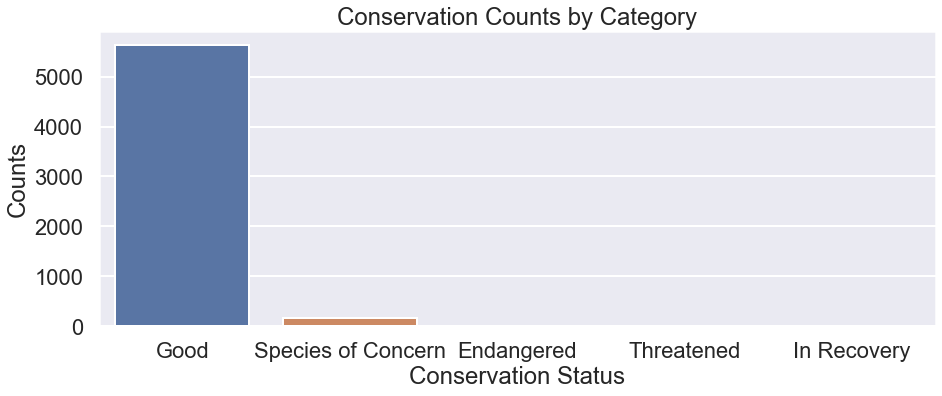

In [34]:
plt.figure(figsize= (15,25))
sns.set_theme('poster')
ax1 = plt.subplot(4,1,1)
sns.countplot(x = 'conservation_status', data= species)
plt.title('Conservation Counts by Category')
plt.xlabel('Conservation Status')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

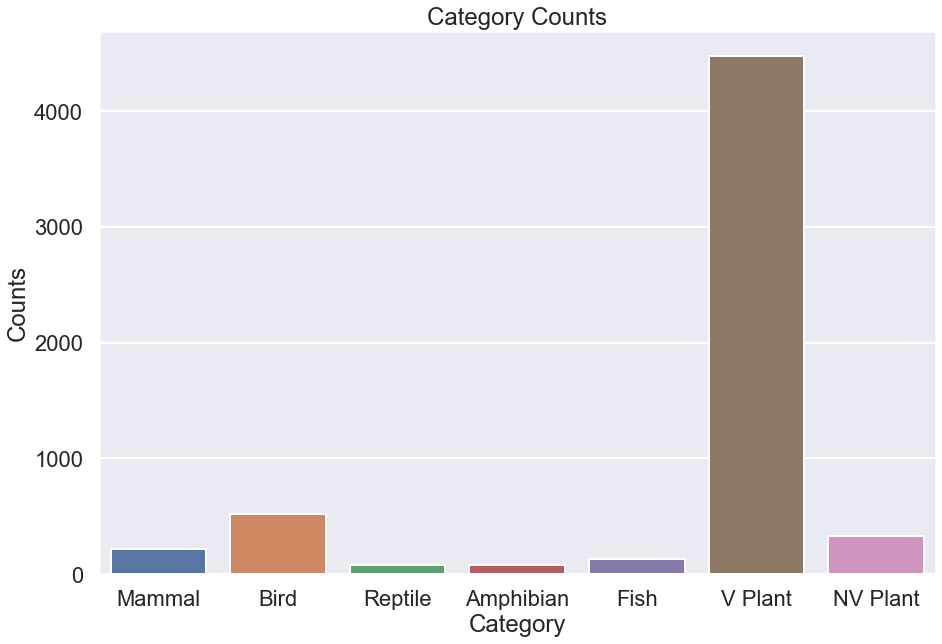

In [35]:
plt.figure(figsize = (15,10))
sns.countplot(x = 'category', data= species)
plt.title('Category Counts')
plt.xlabel('Category')
plt.ylabel('Counts')

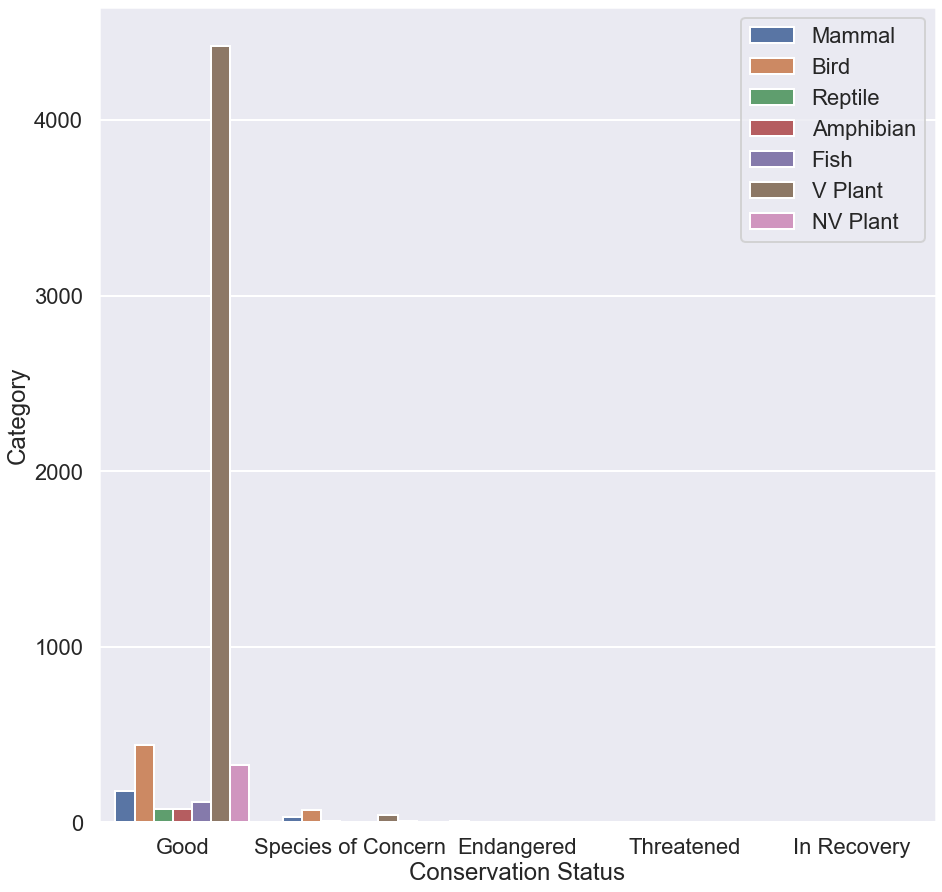

In [36]:
plt.figure(figsize = (15,15))
sns.countplot(x = 'conservation_status' , hue = 'category', data= species)
plt.xlabel('Conservation Status')
plt.ylabel('Category')
plt.legend(loc = 'upper right')

Text(0, 0.5, 'Observations')

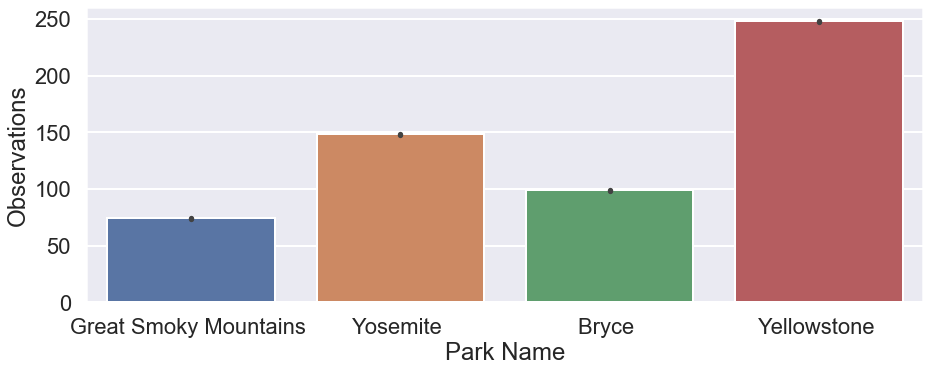

In [37]:
plt.figure(figsize = (15,25))
plt.subplot(4,1,4)
sns.barplot(x = 'park_name' , y = 'observations', data= obs)
plt.xlabel('Park Name')
plt.ylabel('Observations')

After doing the different plots, a few high level observations become apparent. Across all locations, the species of concern that are vascular plants is the most common group. However, when you look at conversation status and the category, birds are far and away the highest count of species of concern, fish are most threatened, and mammals are the most endangered. It is hard to tell this from the graphs, and will organize the information to get values further into the analysis. 

Next I am going to break down the different conversation statuses without those labeled good to see if there is a trend in the conservation status by park name. The intent is to see if location is a factor in the conservation status. 

Because the number of good species is very high, I do one more graph to see the count by conservation status removing those classified as 'good' to representat the other labels. 

Text(0, 0.5, 'Counts')

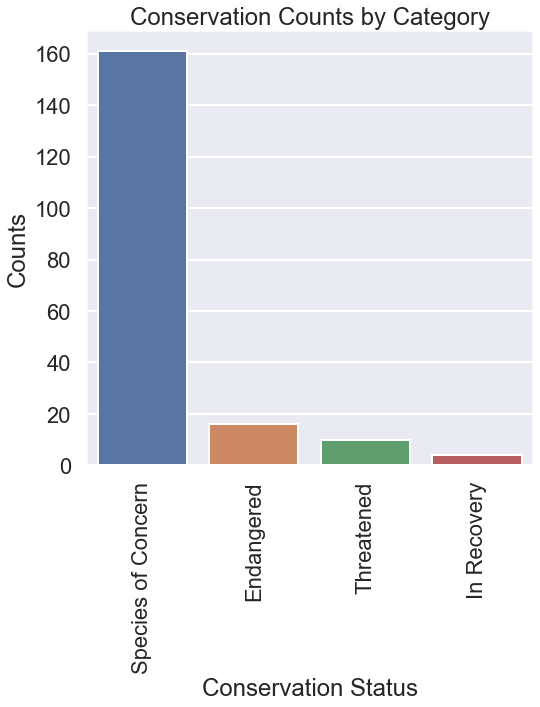

In [38]:
plt.figure(figsize = (8,8))
species_no_good = species[species.conservation_status!='Good']
sns.set_theme('poster')
ax3 =sns.countplot(x = 'conservation_status', data= species_no_good)
plt.title('Conservation Counts by Category')
#ax3.set_xticks([1,2,3,4])
#plt.set_xlabels(['Species of Concern', 'Endangered', 'Threatened', 'In Recovery'])
ax3.set_xticklabels(ax3.get_xticklabels(),rotation=90)
ax3.set_xlabel('Conservation Status')
ax3.set_ylabel('Counts')

With removing the good status, it becomes eaiser to see the other categories. Thre are a few endangered species and a few species of concerns. Next it would be great to break down the information by category type to come up with a hypothesis of the most common category in each conservation status. 

In [39]:
conservationCategory = species[species.conservation_status != "Good"]\
    .groupby(["conservation_status", "category"])['scientific_name']\
    .count()\
    .unstack()

Text(0, 0.5, 'Scentific Name Counts')

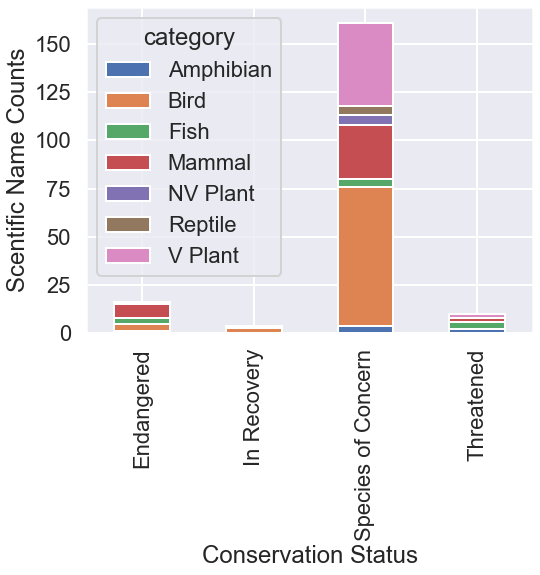

In [40]:
ax = conservationCategory.plot(kind = 'bar', figsize=(8,6),\
                             stacked= True)
ax.set_xlabel('Conservation Status')
ax.set_ylabel('Scentific Name Counts')

Having the stcked bar graph can make it easy to quickly identify the that birds are the most common species of concern and that mamels are the most endangered. Fish is easily the most threatened and birds top out those in recovery. 

In [41]:
species['unprotected'] = species.conservation_status != 'Good'

In [42]:
category_counts = species.groupby(['category', 'unprotected'])\
                        .scientific_name.nunique()\
                        .reset_index()\
                        .pivot(columns='unprotected',
                                      index='category',
                                      values='scientific_name')\
                        .reset_index()
category_counts.columns = ['category', 'unprotected', 'protected']

category_counts

,category,unprotected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,NV Plant,328,5
5,Reptile,73,5
6,V Plant,4216,46


The above table gives an example of total values, but it would help to have percentages to see which animals are suffering the most at a glance. 

In [43]:
category_counts['Percentage'] = round(category_counts.protected/np.add\
    (category_counts.unprotected, category_counts.protected)*100, 2)
category_counts

,category,unprotected,protected,Percentage
0,Amphibian,72,7,8.86
1,Bird,413,75,15.37
2,Fish,115,11,8.73
3,Mammal,146,30,17.05
4,NV Plant,328,5,1.50
5,Reptile,73,5,6.41
6,V Plant,4216,46,1.08


Some interesting observations can come from looking at percentages. The percentages show that the observations for mammals and birds are much higher in terms of protected species. The other species, like vascular plants make up a large count of observations but a much smaller number of protect species. However, the counts are higher, there still needs to be a check on statistical significance. 

# Statistical significance of each population

Next I will conduct a chi square test to see which of the categories are statistically significant. Just because the counts or percentages are high, they may not reach a statistically significant threshold. I am comparing the different species of concern from the above graph to see if there is a strong relationship between the different types of species. 

In [44]:
chi2, pval, dof, expected = chi2_contingency([[413, 75],[146, 30]])
print('Mammal and Bird Chi Square Test \n\nchi2: ',chi2,'\n\npval: ',\
      pval,'\n\ndof: ',dof,'\n\nExpected: ', expected)

Mammal and Bird Chi Square Test 

chi2:  0.16170148316545574 

pval:  0.6875948096661336 

dof:  1 

Expected:  [[410.8313253  77.1686747]
 [148.1686747  27.8313253]]


In [45]:
chi2, pval, dof, expected = chi2_contingency([[72, 7],[146, 30]])
print('Mammal and Amphibian Chi Square Test \n\nchi2: ',chi2,'\n\npval: ',\
      pval,'\n\ndof: ',dof,'\n\nExpected: ', expected)

Mammal and Amphibian Chi Square Test 

chi2:  2.321746712946015 

pval:  0.12757669693198975 

dof:  1 

Expected:  [[ 67.5372549  11.4627451]
 [150.4627451  25.5372549]]


In [46]:
chi2, pval, dof, expected = chi2_contingency([[115, 11],[146, 30]])
print('Mammal and Fish Chi Square Test \n\nchi2: ',chi2,'\n\npval: ',\
      pval,'\n\ndof: ',dof,'\n\nExpected: ', expected)

Mammal and Fish Chi Square Test 

chi2:  3.647651024981415 

pval:  0.0561483484489001 

dof:  1 

Expected:  [[108.89403974  17.10596026]
 [152.10596026  23.89403974]]


It is interesting to see a statistically significant result between mammals and fish. Further investigation of causes of species being endangered will be needed to establish a causal link. There is also a significant relationship between mammals and amphibians. There isn't a significant result with mammels and birds. It would be interesting for further explore any relationship between water access and conservation status. 

# Reviewing information by Park and Significance Testing

Now we will merge the two data frames to review observations of different categories and species. I am merging the two data sources together on the scientific names as both dataframes have the keys. The merge allows review of conservation status by park and by category fairly easily. I'll create several graphs to explore these relationships by park. 

In [47]:
all_df = obs.merge(species, how = 'outer', on = 'scientific_name')
all_df

,scientific_name,park_name,observations,category,common_names,conservation_status,unprotected
0,Vicia benghalensis,Great Smoky Mountains,68,V Plant,"Purple Vetch, Reddish Tufted Vetch",Good,False
1,Vicia benghalensis,Yosemite,148,V Plant,"Purple Vetch, Reddish Tufted Vetch",Good,False
2,Vicia benghalensis,Yellowstone,247,V Plant,"Purple Vetch, Reddish Tufted Vetch",Good,False
3,Vicia benghalensis,Bryce,104,V Plant,"Purple Vetch, Reddish Tufted Vetch",Good,False
4,Neovison vison,Great Smoky Mountains,77,Mammal,American Mink,Good,False
...,...,...,...,...,...,...,...
25627,Gulo gulo,Yosemite,157,Mammal,Wolverine,Good,False
25628,Dichanthelium depauperatum,Great Smoky Mountains,88,V Plant,"Green Panic-Grass, Panic Grass",Good,False
25629,Dichanthelium depauperatum,Bryce,80,V Plant,"Green Panic-Grass, Panic Grass",Good,False
25630,Dichanthelium depauperatum,Yellowstone,255,V Plant,"Green Panic-Grass, Panic Grass",Good,False


<AxesSubplot:>

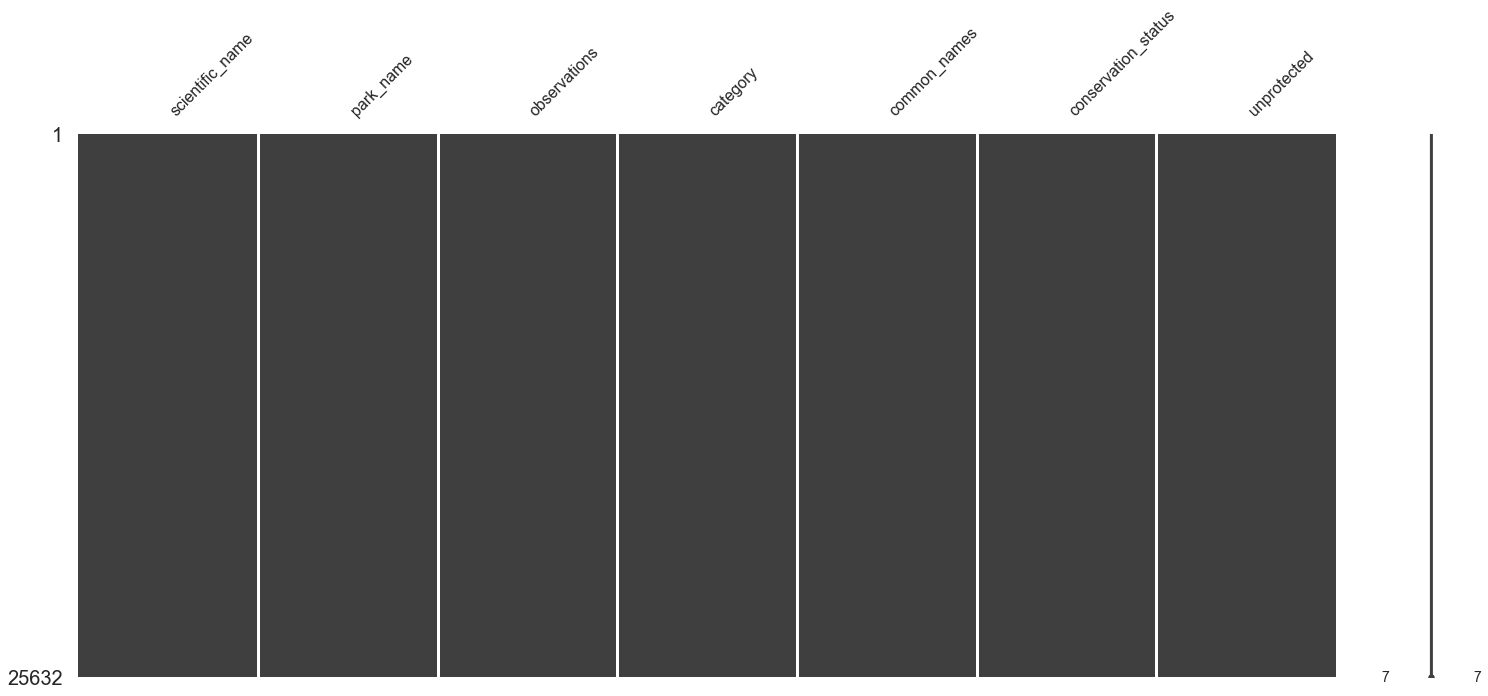

In [48]:
msno.matrix(all_df)

With the combined data frame, analysis of the number of observations can begin. I start by getting a sense of the observations by each category type. I start by looking at the actual values to know the true underlying data. 

In [49]:
cat_distribution = all_df[['category', 'observations']].groupby(['category']).observations.sum()\
    .sort_values(ascending=False).reset_index()
cat_distribution

,category,observations
0,V Plant,2795312
1,Bird,332371
2,NV Plant,190653
3,Mammal,163120
4,Fish,72901
5,Reptile,45822
6,Amphibian,45068


While actual values are useful for the total counts, breaking the information down by percentages makes it easier to understand and analyze. 

Text(0, 0.5, 'Observations')

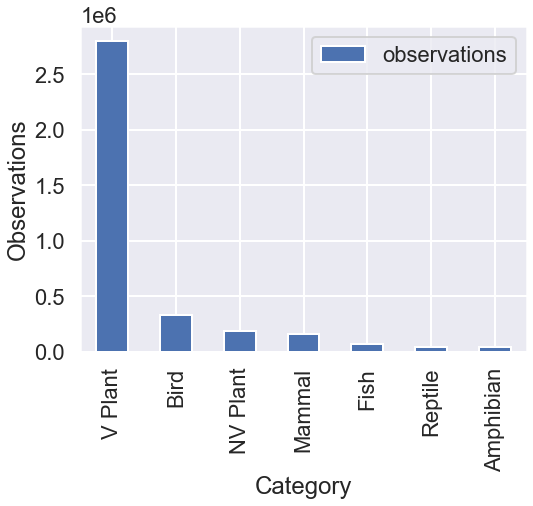

In [50]:
ax3 = cat_distribution.plot(kind = 'bar', figsize=(8,6),\
                             stacked= True)
ax3.set_xticks(range(len(cat_distribution.category)))
ax3.set_xticklabels(cat_distribution.category.unique())
ax3.set_xlabel('Category')
ax3.set_ylabel('Observations')

In [51]:
obs_count = cat_distribution.observations.sum()
print(obs_count)
cat_distribution['Percentages']= cat_distribution.observations.apply(lambda x: round(x/obs_count,2)*100)
cat_distribution

3645247


,category,observations,Percentages
0,V Plant,2795312,77.0
1,Bird,332371,9.0
2,NV Plant,190653,5.0
3,Mammal,163120,4.0
4,Fish,72901,2.0
5,Reptile,45822,1.0
6,Amphibian,45068,1.0


I know want to see a breakdown of the observations by park and the category. A stacked bar graph will make it easy to visually see the main observations by species type. The values will be large for each of the stacked graphs. 

Text(0, 0.5, 'Observations')

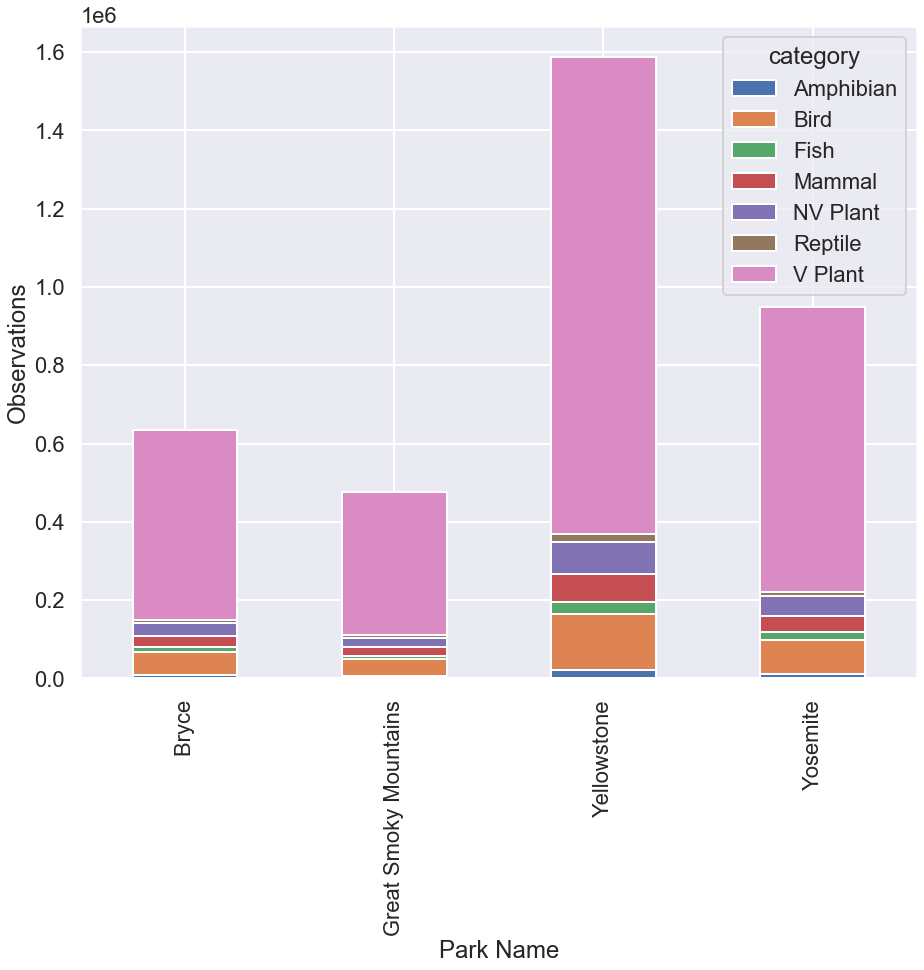

In [52]:
park_plot = all_df.groupby(["park_name", 'category']).observations.sum().unstack()

ax3 = park_plot.plot(kind = 'bar', figsize=(15,12),\
                             stacked= True)
ax3.set_xlabel('Park Name')
ax3.set_ylabel('Observations')

It easily stands out that non-vascular plants are the majority of observations in each park. This matches with the overall count. It is clear that the observations of vascular plants are skewed heavily in Yellowstone. The other categories are also heavily represented in Yellowstone. 

For looking at each park, I will look at the percentage of each species and any statistcal significance between the different species and conservation status. I'll leave breaking down the specific statistical significance to each category. 

In [56]:
print('Table of percentages by park and category')
park_plot_percentage = park_plot.apply(lambda x : round(x/x.sum()*100,2), axis = 1)
park_plot_percentage

Table of percentages by park and category


category,Amphibian,Bird,Fish,Mammal,NV Plant,Reptile,V Plant
park_name,,,,,,,
Bryce,1.19,9.25,2.02,4.55,5.21,1.29,76.49
Great Smoky Mountains,1.24,9.03,2.00,4.43,5.23,1.23,76.84
Yellowstone,1.26,9.09,1.98,4.45,5.23,1.26,76.73
Yosemite,1.23,9.12,2.02,4.48,5.24,1.24,76.66


<AxesSubplot:xlabel='category', ylabel='park_name'>

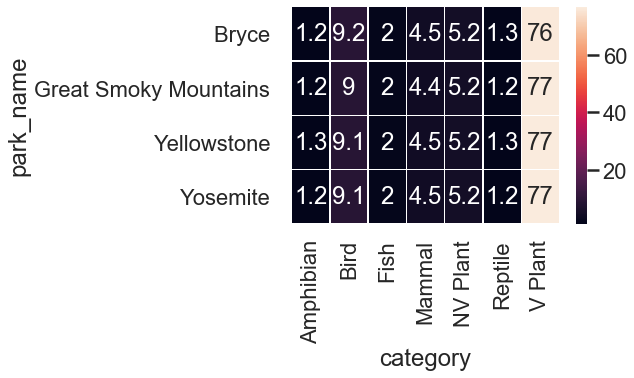

In [57]:
sns.heatmap(park_plot_percentage, annot=True, linewidths=.5)

I was hoping the heat map would give a better visual of the distribution of percentages. Instead it looks heavily skewed to Vascular plants. I kept it in the project since I like to show that it was explored by didn't give an interesting result. 

In [52]:
chi2, pval, dof, expected = chi2_contingency(park_plot)
print('Park and Category \n\nchi2: ',chi2,'\n\npval: ',\
      pval,'\n\ndof: ',dof,'\n\nExpected: ', expected)

Park and Category 

chi2:  66.92082495273974 

pval:  1.4888948996305367e-07 

dof:  18 

Expected:  [[   7829.69131804   57743.01795214   12665.13550138   28338.93777843
    33122.26277753    7960.6842011   485631.27047138]
 [   5870.96723048   43297.6668448     9496.7467398    21249.49353501
    24836.19231811    5969.19012237  364142.74320945]
 [  19628.79458868  144759.96463642   31751.10398308   71044.84275551
    83036.49096289   19957.18970539 1217462.61336804]
 [  11738.54686281   86570.35056664   18988.01377575   42486.72593105
    49658.05394148   11934.93597114  728075.37295113]]


Reviewing the values, I can say there is a statistical link between the park, the number of observations by category. The pval is well below the typical .05 threshold used for statistical significance. Further work is needed to review each park and category to see which combinations specifically have statistical significance. 

## Conclusions



In reviewing the information a few interesting results were observed. There was a review of the different species and any statistical signifigance. It was discovered that any land and water based categories had a correletation. But any bird species were not statistically significant. 

Stripping out the conservation status of good, it becomes apparent that mammals are the most endangered, birds are species of concern, and fish are threatened. The vast majority of species of concern from all parks dominate the number of species that warrent further investigation. What was not reviewed during this project and could be done as further analysis is finding a relationship between the number of observations and the statistical significance.

Furthermore, there is a strong statistical signficance between the different parks and the the species type. This means that the observations do play a role in the outcome of species observed. Further work can be done to review by each park and species type for statistical signifigance of a specific grouping. 